# Análisis Comportamiento de usuarios activos de TC en los últimos 6 meses

# Import libraries


In [142]:
!pip install scikit-learn-extra


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import os
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_moons

# Load the dataset


In [143]:
data = pd.read_csv('CC GENERAL.csv')

In [144]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploratory Data Analysis


# Data Processing


In [145]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [146]:
print("\nEstadísticas descriptivas:")
print(data.describe())


Estadísticas descriptivas:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000    

## Data Cleaning


## Verificar si hay duplicados

In [147]:
print("\nNúmero de filas duplicadas:")
print(data.duplicated().sum())


Número de filas duplicadas:
0


## Verificar valores faltantes

In [148]:
print("\nNúmero de valores faltantes:")
data.isnull().sum()


Número de valores faltantes:


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Se verifica que existen 313 valores nulos, se entiende que los campos están vacios porque el cliente no ha realizado pagos mínimos; por eso se decide poner en '0'. La otra variable "credit limit" solo contiene 1  campo vacío por lo que se decide reemplazar con'0' en ambos casos.


In [149]:
data2 = data.fillna(0)

In [150]:
data2.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Estadísticas descriptivas

In [151]:
print("\nEstadísticas descriptivas:")
print(data2.describe())



Estadísticas descriptivas:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000    

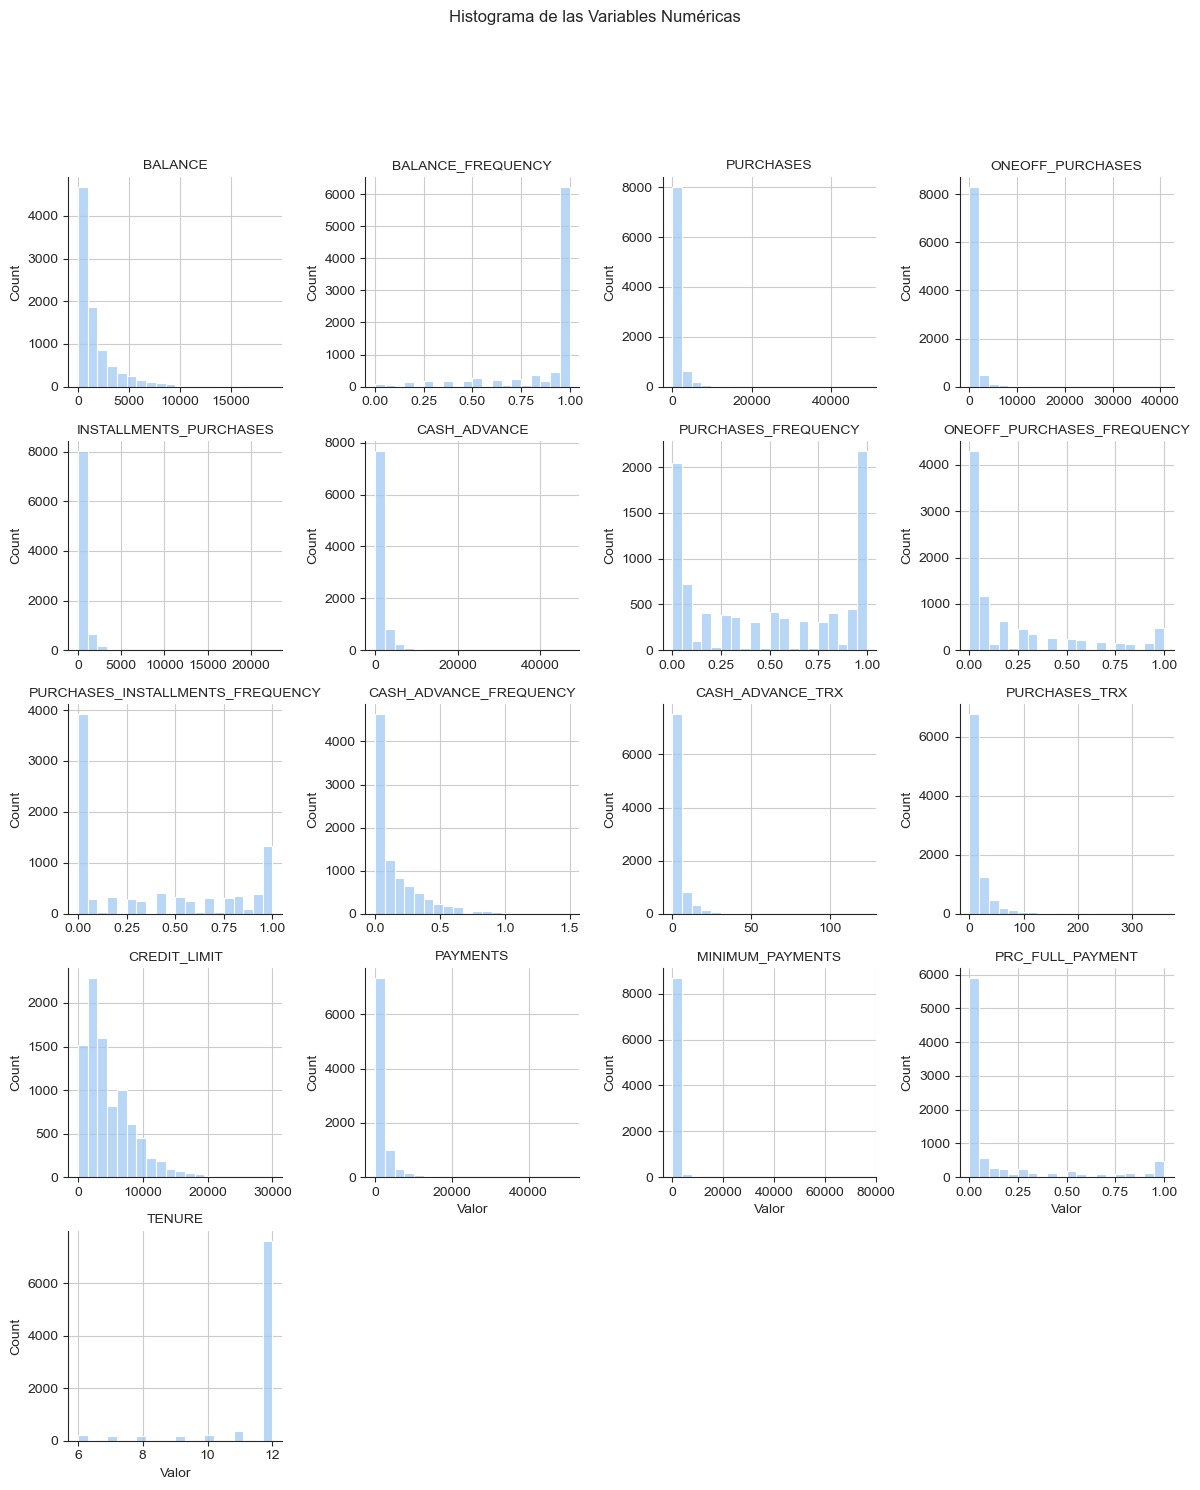

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona solo las variables numéricas
data_num = data2.select_dtypes(include=['number'])

# Convierte el DataFrame a formato largo
data_melted = data_num.melt(var_name='Variable', value_name='Valor')

# Usa FacetGrid para crear el histograma
g = sns.FacetGrid(data_melted, col='Variable', col_wrap=4, sharex=False, sharey=False, height=3)
g.map(sns.histplot, 'Valor', bins=20)

# Activar cuadrícula en cada gráfico
for ax in g.axes.flat:
    ax.grid(True)  # Activa la cuadrícula

# Configuración de títulos y ajuste de la cuadrícula general
g.set_titles("{col_name}")
g.fig.suptitle('Histograma de las Variables Numéricas', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta el espacio para el título
plt.show()


Los histogramas previamente graficados muestran una distribución sesgada a la izquierda en las variables de "Balance", "Purchases", "Credit_limit", "Payments" y "Cash Advance", lo cual puede interpretarse como que la mayoría de usuarios realizan compras de pequeños valores por tanto su límite de crédito se concentra en valores pequeños, así mismo el pago de sus tarjetas. 

Por otro lado la antiguedad de la tc "Tenure" es de un año, es decir, se entiende que el comportamiento de estos usuarios se puede interpretar de mejor forma porque tienen una antiguedad suficiente con la tarjeta de crédito para ser analizados.

Existe otro tipo de variables como "Purchase_Frequency" que se concentran en los extremos, es decir o no tienen casi frecuencia de compra o si compran frecuentemente (es de extremos - uno de los dos).

# Gráfico de correlación (heatmap)

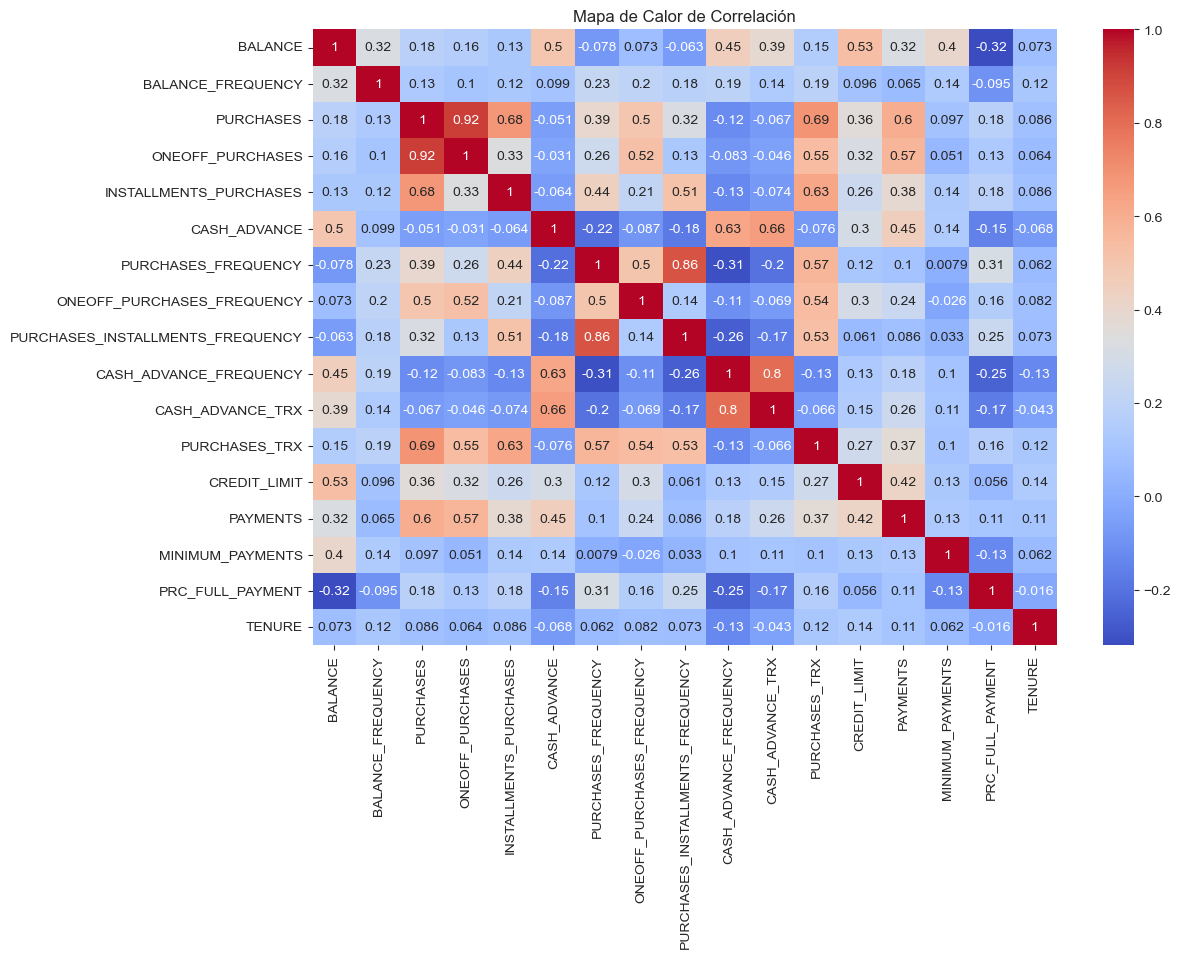

In [153]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_num.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

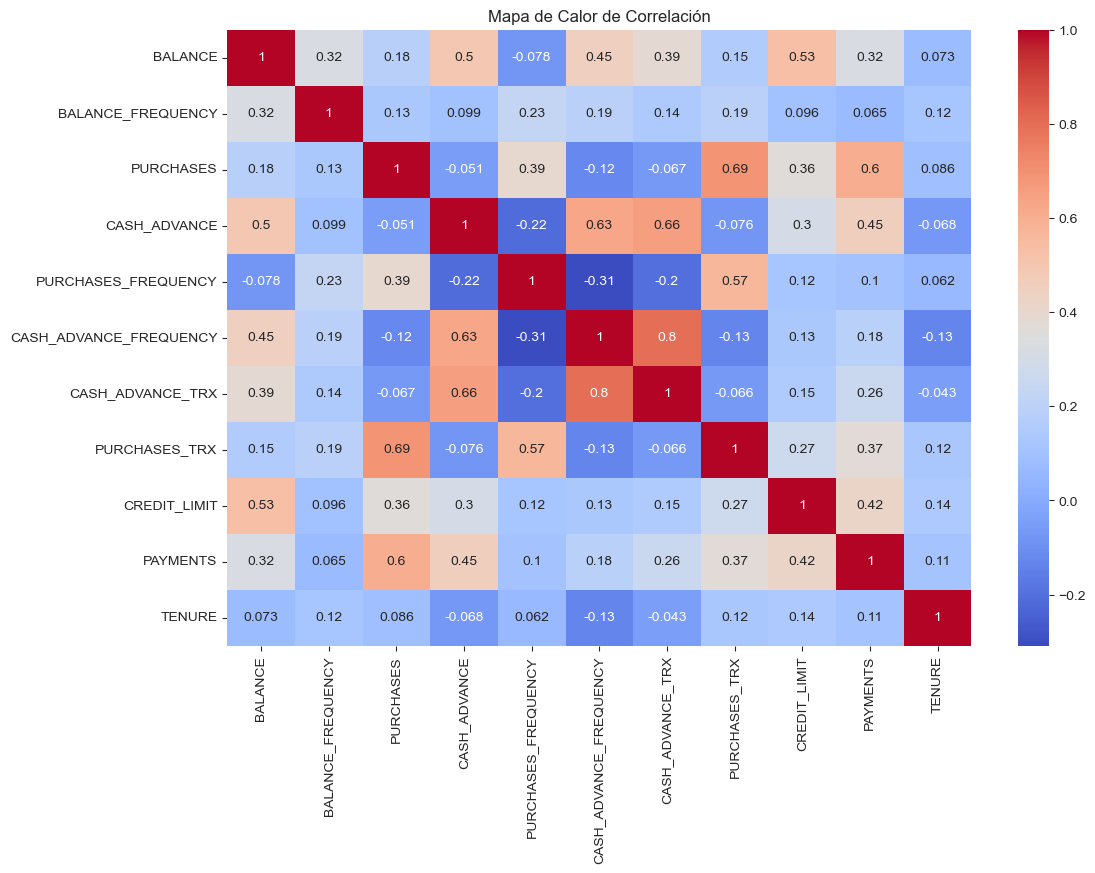

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona solo las columnas deseadas, incluyendo tenure
selected_columns = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE', 
    'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 
    'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'TENURE'
]
data_selected = data2[selected_columns]

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(data_selected.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

Se procedió a realizar un análisis de correlación entre las variables que contiene el dataset, sin embargo por la cantidad de variables existentes, se hizo un filtro para seleccionar aquellas que pueden tener una mayor importancia en el análisis. 

De esta forma resulta interesante destacar que la variable "Balance" tiene una correlación positiva a destacar con el "Cash_advance", asimismo con el "Credit_limit" lo cual puede deberse a que las personas que tienen un balance mayor, tienen un bajo nivel de liquidez a nivel de efectivo y una necesidad mayor de tener este flujo de liquidez, por otro lado, se puede interpretar que aquellos usuarios que tienen un nivel de límite de crédito superior, poseen un perfil que les permite retirar una cantidad mayor de efectivo. 

Existen también otro tipo de relaciones que se entienden por la misma naturaleza de las variables, como aquella entre los pagos y las compras, es decir, a mayor monto de compras con las tarjetas, más es el monto de pagos que realizan los usuarios. De igual forma mientras mayor es el monto de cash advance, también hay una relación positiva con la frecuencia con que se realiza el cash advance. 

## Feature Engineering
Cree al menos 2 variables nuevas


In [155]:
data2.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [156]:
data2.replace([float('inf'), -float('inf')], 0, inplace=True)

In [157]:
bin_edges = [0, 6, 8, 12] 
labels = ['Cliente_Nuevo', 'Cliente_Poca_Experiencia', 'Cliente_Con_Experiencia'] 
data2['Antiguedad_TC'] = pd.cut(data2['TENURE'], bins=bin_edges, labels=labels, include_lowest=True)
data2['Antiguedad_TC'].value_counts()

Cliente_Con_Experiencia     8360
Cliente_Poca_Experiencia     386
Cliente_Nuevo                204
Name: Antiguedad_TC, dtype: int64

In [158]:
proportions_Antiguedad_Tc = data2['Antiguedad_TC'].value_counts(normalize=True) * 100

In [159]:
proportions_Antiguedad_Tc

Cliente_Con_Experiencia     93.407821
Cliente_Poca_Experiencia     4.312849
Cliente_Nuevo                2.279330
Name: Antiguedad_TC, dtype: float64

In [161]:
bin_edges = [0, 1000, 5000, 10000, data2['CREDIT_LIMIT'].max() + 1]
labels = ['Bajo (0-1000)', 'Medio (1001-5000)', 'Alto (5001-10000)', 'Muy Alto (>10000)']
data2['Límite_Crédito'] = pd.cut(data2['CREDIT_LIMIT'], bins=bin_edges, labels=labels, include_lowest=True)
data2['Límite_Crédito'].value_counts()

Medio (1001-5000)    5220
Alto (5001-10000)    2211
Bajo (0-1000)         832
Muy Alto (>10000)     687
Name: Límite_Crédito, dtype: int64

In [162]:
proportions_Clasificacion_Límite_Crédito = data2['Límite_Crédito'].value_counts(normalize=True) * 100

In [164]:
proportions_Clasificacion_Límite_Crédito

Medio (1001-5000)    58.324022
Alto (5001-10000)    24.703911
Bajo (0-1000)         9.296089
Muy Alto (>10000)     7.675978
Name: Límite_Crédito, dtype: float64

In [166]:
data2['CREDIT_UTILIZATION_RATIO'] = data2['BALANCE'] / data2['CREDIT_LIMIT']

In [167]:
data2['PAYMENT_RATIO'] = data2['PAYMENTS'] / data2['BALANCE']

Se crearon cuatro variables, dos categóricas: 

    - 'Antiguedad TC': Con el propósito de agrupar aquellos clientes con una TC de 1 año, es decir que tienen experiencia de crédito (que representa la mayoría), con 6 meses hasta menos de 12 meses distinguiéndolos como usuarios con poca experiencia y aquellos sin experiencia que son clientes nuevos con TC con una antiguedad menor a 6 meses. 
    
    - 'Límite de Crédito': Se creó esta agrupación para establecer una segmnentación de crédito en función al perfil del usuario, es decir, se entiende que los que tienen mayor límite de crédito tienen mayores ingresos o una mayor capacidad de pago que permiten justificar el cupo que se les otorga, de la misma forma funciona de manera inversa. 
 
y dos continuas por su relevancia e interés en el análisis: 

    - 'CREDIT_UTILIZATION_RATIO': Variable que permite identificar el ratio de crédito que está utilizando el cliente sobre el cupo disponible, ya que generalmente se considera en riesgos que si se tiene un cupo de utilización muy alto y cerca del límite se entiende como un mayor riesgo de crédito.
    
    - 'PAYMENT_RATIO': Variable que permite calcular la proporción de pagos que están haciendo los usuarios frente a su balance. Así se entiende que mientras mayor es el ratio de signfica que los usuarios están siendo resposables con los pagos que les correponden y visceversa.

In [168]:
data2.replace([float('inf'), -float('inf')], 0, inplace=True) 

In [169]:
data2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Antiguedad_TC,Límite_Crédito,CREDIT_UTILIZATION_RATIO,PAYMENT_RATIO
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,Cliente_Con_Experiencia,Bajo (0-1000),0.040901,4.933946
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,Cliente_Con_Experiencia,Alto (5001-10000),0.457495,1.281210
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,Cliente_Con_Experiencia,Alto (5001-10000),0.332687,0.249310
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,0.000000,0.000000,12,Cliente_Con_Experiencia,Alto (5001-10000),0.222223,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,Cliente_Con_Experiencia,Medio (1001-5000),0.681429,0.829550


In [170]:
data2.dtypes

CUST_ID                               object
BALANCE                              float64
BALANCE_FREQUENCY                    float64
PURCHASES                            float64
ONEOFF_PURCHASES                     float64
INSTALLMENTS_PURCHASES               float64
CASH_ADVANCE                         float64
PURCHASES_FREQUENCY                  float64
ONEOFF_PURCHASES_FREQUENCY           float64
PURCHASES_INSTALLMENTS_FREQUENCY     float64
CASH_ADVANCE_FREQUENCY               float64
CASH_ADVANCE_TRX                       int64
PURCHASES_TRX                          int64
CREDIT_LIMIT                         float64
PAYMENTS                             float64
MINIMUM_PAYMENTS                     float64
PRC_FULL_PAYMENT                     float64
TENURE                                 int64
Antiguedad_TC                       category
Límite_Crédito                      category
CREDIT_UTILIZATION_RATIO             float64
PAYMENT_RATIO                        float64
dtype: obj

## Encoding


In [171]:
cust_ids = data2['CUST_ID']
data2 = data2.drop(columns=['CUST_ID'])

Se procedió a quitar la columna de identificación del cliente, ya que no contribuye al poder de predicción del modelo. 

In [172]:
data2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Antiguedad_TC,Límite_Crédito,CREDIT_UTILIZATION_RATIO,PAYMENT_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,1000.0,201.802084,139.509787,0.000000,12,Cliente_Con_Experiencia,Bajo (0-1000),0.040901,4.933946
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,Cliente_Con_Experiencia,Alto (5001-10000),0.457495,1.281210
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,Cliente_Con_Experiencia,Alto (5001-10000),0.332687,0.249310
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1,7500.0,0.000000,0.000000,0.000000,12,Cliente_Con_Experiencia,Alto (5001-10000),0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,Cliente_Con_Experiencia,Medio (1001-5000),0.681429,0.829550


<Figure size 1600x1000 with 0 Axes>

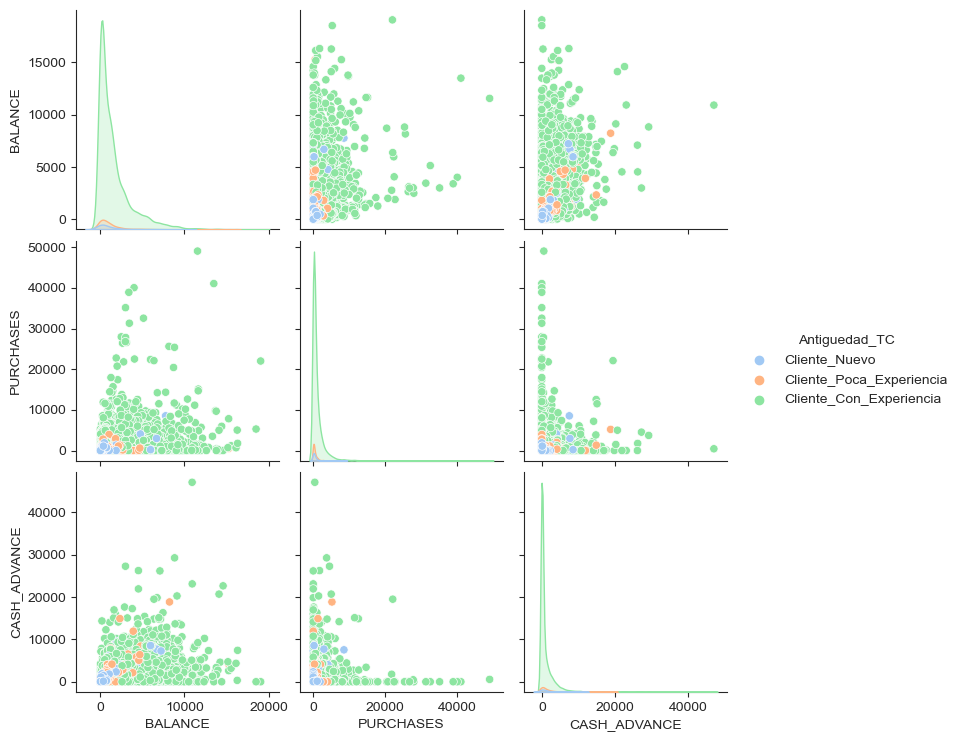

In [173]:
cluster_cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE']
plt.figure(1, figsize=(16,10))
sns.pairplot(data=data2[cluster_cols+['Antiguedad_TC']], hue='Antiguedad_TC')
plt.show()

<Figure size 1600x1000 with 0 Axes>

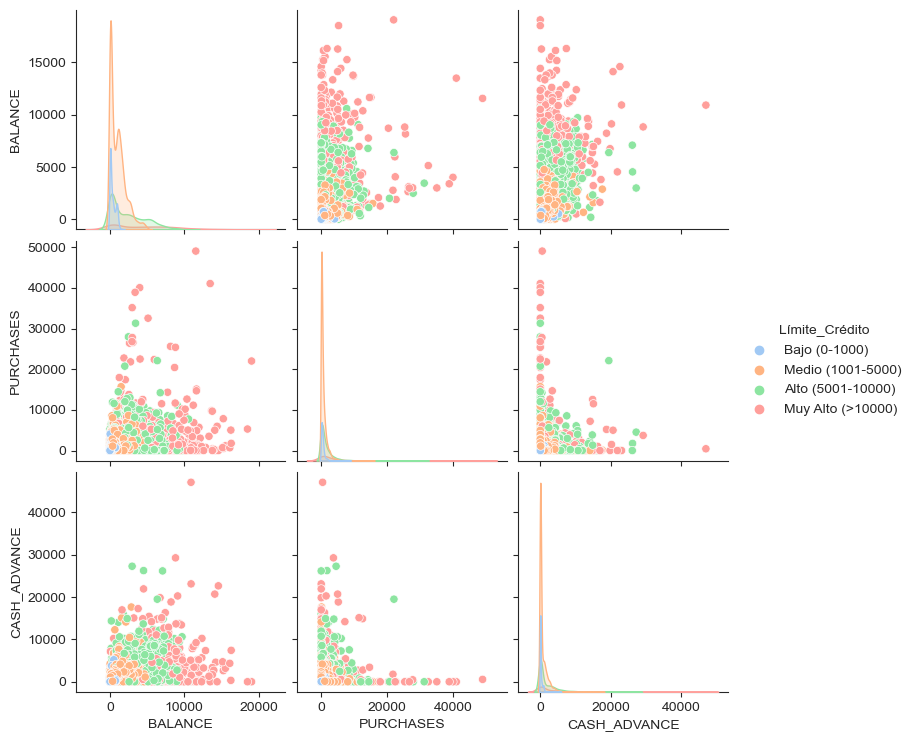

In [174]:
cluster_cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE']
plt.figure(1, figsize=(16,10))
sns.pairplot(data=data2[cluster_cols+['Límite_Crédito']], hue='Límite_Crédito')
plt.show()

Se puede ver a través de los gráficos que existe un sesgo hacia la izquierda para las tres variables que se graficaron en función a las variables categóricas creadas: Antiguedad_TC y Límite_Crédito. Si bien se observa que para Antiguedad_TC predominan los clientes determinados con experiencia, mientras que en Límite_Crédito la segmentación se encuentra mejor distribuida, si bien predominan aquellos clasificados en el segmento de límite de crédito medio.

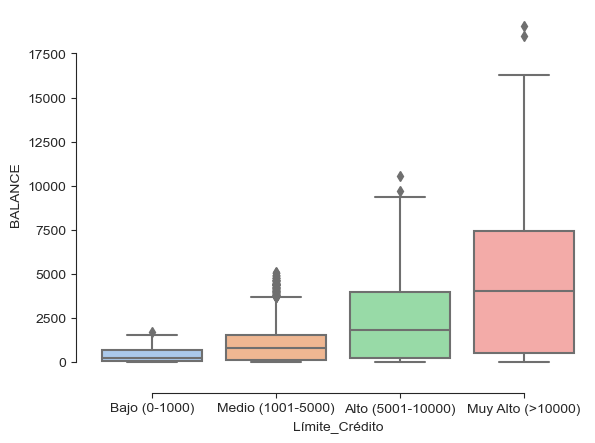

In [175]:
sns.set_style(style="ticks")
sns.set_palette("pastel")

sns.boxplot(x="Límite_Crédito", y="BALANCE",
            data=data2)
sns.despine(offset=10, trim=True)

El diagrama de cajas previo muestra la distribución de Balance en las diferentes categorías de Límite_crédito, existe una relación evidente en donde mientras mayor es el límite de crédito del usuario de TC, mayor balance tendrá. Resulta interesante ver que para los rangos de "Alto" y "Muy Alto", el rango intercuartil es más amplio, lo que implica mayor variabilidad en el balance de los usuarios de aquellos grupos. De esta forma, los clientes con límites de crédito más altos (especialmente en "Muy Alto" y "Alto") podrían estar utilizando más de su crédito, lo que conlleva a que tengan balances más altos. Esto puede ser indicativo de un mayor nivel de gasto o una tendencia a mantener un balance alto en lugar de pagarlo por completo cada mes.

## Scaling (if needed)


In [176]:
all_vars = data2.columns
print(all_vars)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Antiguedad_TC', 'Límite_Crédito', 'CREDIT_UTILIZATION_RATIO',
       'PAYMENT_RATIO'],
      dtype='object')


In [177]:
numeric_vars = list(data2[all_vars].select_dtypes(include=[np.number]).columns)
str_vars = list(data2[all_vars].select_dtypes(include=["category"]).columns)
str_vars

['Antiguedad_TC', 'Límite_Crédito']

In [261]:
columns_to_scale = ['BALANCE', 'PURCHASES','PAYMENTS']
scaler= StandardScaler()
data2[columns_to_scale] = scaler.fit_transform(data2[columns_to_scale])

In [301]:
print(data2[columns_to_scale].head())

    BALANCE  PURCHASES  PAYMENTS
0 -0.731989  -0.424900 -0.528979
1  0.786961  -0.469552  0.818642
2  0.447135  -0.107668 -0.383805
3  0.049099   0.232058 -0.598688
4 -0.358775  -0.462063 -0.364368


In [179]:
def porcentaje_nulos_por_fila(df):
    porcentaje_nulos = data2.isnull().mean(axis=1) * 100
    return porcentaje_nulos

porcentaje_nulos = porcentaje_nulos_por_fila(data2)
porcentaje_nulos

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8945    0.0
8946    0.0
8947    0.0
8948    0.0
8949    0.0
Length: 8950, dtype: float64

In [180]:
data2["porcentaje_nulos"]=porcentaje_nulos
data2["porcentaje_nulos"].describe()

count    8950.000000
mean        0.018622
std         0.297219
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.761905
Name: porcentaje_nulos, dtype: float64

In [181]:
all_vars = list(data2.drop(columns=["porcentaje_nulos"]).columns)
all_vars

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'Antiguedad_TC',
 'Límite_Crédito',
 'CREDIT_UTILIZATION_RATIO',
 'PAYMENT_RATIO']

In [302]:
scaler = StandardScaler()
data2[numeric_vars] = scaler.fit_transform(data2[numeric_vars])

In [303]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Crear un transformer para las columnas numéricas (escalado)
numeric_transformer = MinMaxScaler()

# Crear un transformer para las columnas categóricas (OneHotEncoder)
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Crear un ColumnTransformer que aplique el escalado y OneHotEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_vars),
        ('cat', categorical_transformer, str_vars)
    ])

In [304]:
# Ajustar y transformar los datos con el preprocesador
preprocessed_data = preprocessor.fit_transform(data2)

# Mostrar los datos preprocesados
print(preprocessed_data)

[[5.43670276e-03 8.18182000e-01 1.94536779e-03 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.41050622e-01 9.09091000e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.21220897e-01 1.00000000e+00 1.57662475e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.47160459e-03 8.33333000e-01 2.94456089e-03 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.87440725e-04 8.33333000e-01 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.16495367e-02 6.66667000e-01 2.22932216e-02 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]


In [305]:
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(str_vars)
df_preprocessed = pd.DataFrame(preprocessed_data, columns=numeric_vars + list(categorical_feature_names))
print("DataFrame preprocesado:")
print(df_preprocessed)

DataFrame preprocesado:
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.005437           0.818182   0.001945          0.000000   
1     0.541051           0.909091   0.000000          0.000000   
2     0.421221           1.000000   0.015766          0.018968   
3     0.280865           0.636364   0.030567          0.036775   
4     0.137040           1.000000   0.000326          0.000393   
...        ...                ...        ...               ...   
8945  0.003335           1.000000   0.005936          0.000000   
8946  0.001757           1.000000   0.006118          0.000000   
8947  0.002472           0.833333   0.002945          0.000000   
8948  0.000787           0.833333   0.000000          0.000000   
8949  0.061650           0.666667   0.022293          0.026821   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.004240      0.000000             0.166667   
1                   0.000000      0.136685       

## # Train model/Tune hyperparameters 

Explique el criterio utilizado

In [306]:
df_preprocessed.isna().sum()

BALANCE                                    0
BALANCE_FREQUENCY                          0
PURCHASES                                  0
ONEOFF_PURCHASES                           0
INSTALLMENTS_PURCHASES                     0
CASH_ADVANCE                               0
PURCHASES_FREQUENCY                        0
ONEOFF_PURCHASES_FREQUENCY                 0
PURCHASES_INSTALLMENTS_FREQUENCY           0
CASH_ADVANCE_FREQUENCY                     0
CASH_ADVANCE_TRX                           0
PURCHASES_TRX                              0
CREDIT_LIMIT                               0
PAYMENTS                                   0
MINIMUM_PAYMENTS                           0
PRC_FULL_PAYMENT                           0
TENURE                                     0
CREDIT_UTILIZATION_RATIO                   0
PAYMENT_RATIO                             35
Antiguedad_TC_Cliente_Nuevo                0
Antiguedad_TC_Cliente_Poca_Experiencia     0
Límite_Crédito_Bajo (0-1000)               0
Límite_Cré

Al crear una de las 4 variables en el encoding, la variable PAYMENT_RATIO genero 35 nulos, dentro de los cuales se imputara con 0 puesto que es el resultado de dividir payments para balance y simplemente sigfinica que no ha existido un pago con lo cual seria un error eliminar dichas observaciones.

In [307]:
df_preprocessed["PAYMENT_RATIO"] = df_preprocessed["PAYMENT_RATIO"].fillna(0)

In [308]:
# Método del Codo
sse = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_preprocessed)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_preprocessed, kmeans.labels_))

C:\Users\acris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\acris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\acris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\acris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\acris\anaconda3\Lib\site-packages\sklearn\clust

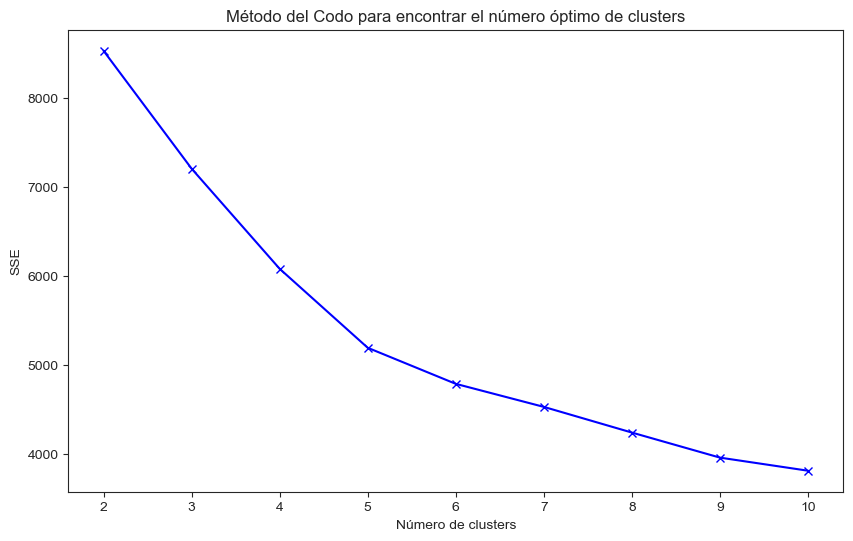

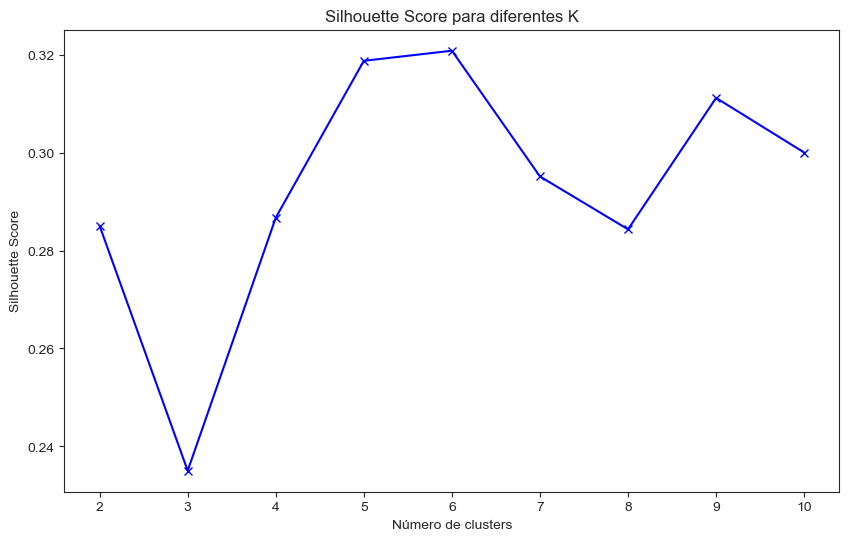

In [309]:
# Gráfico del método del Codo
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()

# Gráfico del Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para diferentes K')
plt.show()

**ANÁLISIS DE MÉTODOS Y SELECCIÓN DE NÚMERO DE CLUSTERS**

***MÉTODO DEL CODO***

En el **gráfico del codo** se observa una diferencia marginal a partir de los clusters 4-5, puesto que la Suma de Errores al Cuadrado se ve menos pronunciada e implica que el número óptimo de clusters se da en ese rango. 


***SILHOUTTE SCORE***

En cuanto al **gráfico del Silhouette Score** se comprueba que el valor más alto del Silhouette score ocurre cuando el numero de clusters es igual a 7, si bien se observa que el cluster 5 muestra un valor alto en el silhouette score. 

***CONCLUSIÓN:***

Ambos metodos nos brindan valores similares, por un lado el metodo del codo sugiere un numero de clusters de 4 o 5 y el Silhouette Score nos sugiere 7 clusters para alcanzar su valor máximo, seguido del número 5. Por lo antes expuesto, en virtud de darle mayor peso a la calidad de separaciones entre clusters, se optara por utilizar 5 clusters como el numero óptimo.


In [310]:
# Como resultado se aplicara KMeans y K-Medoids/K-Medians

optimal_k = 5  # Elegido basado en los gráficos de Silhoutte Score y Grafico del Codo en linea anterior.

#KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_preprocessed)

#K-Medoids
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids_labels = kmedoids.fit_predict(df_preprocessed)


C:\Users\acris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [311]:
kmeans_silhouette = silhouette_score(df_preprocessed, kmeans_labels)
kmedoids_silhouette = silhouette_score(df_preprocessed, kmedoids_labels)


In [312]:
# Es importante calcular la Inercia para KMeans y KMedoids como metrica para el analisis
kmeans_inertia = kmeans.inertia_
kmedoids_inertia = kmedoids.inertia_

#En Kmeans la inercia es la suma de las distancias al cuadrado de cada punto con respecto a su centroide
#En Kmedoids la inercia es la suma de las distancias al cuadrado de cada punto con respecto a su medoide


In [313]:
# Metricas de Kmeans
print(f"KMeans -  Metrica Inercia (SSE): {kmeans_inertia}")
print(f"KMeans - Metrica Silhouette Score: {kmeans_silhouette}")


KMeans -  Metrica Inercia (SSE): 5193.330794293164
KMeans - Metrica Silhouette Score: 0.31874864444204537


In [314]:
# Metricas de KMedoids
print(f"KMedoids - Metrica Inercia: {kmedoids_inertia}")
print(f"KMedoids - Metrica Silhouette Score: {kmedoids_silhouette}")


KMedoids - Metrica Inercia: 7084.232106846292
KMedoids - Metrica Silhouette Score: 0.12964425941704136


**ANÁLISIS DE MÉTRICAS RESULTANTES: ÍNDICE DE SILHOUETTE E INERCIA***

*Inercia SSE* 
-KMeans: el inercia SSE fue de 4581.14685925796
-KMedoids: el inercia SSE fue de 6371.784538329842

*Silhoutte Score*
-KMeans: el Silhouette Score fue de 0.3311299792754651
-KMedoids: el Silhouette Score fue de 0.19552468699451706

***CONCLUSIÓN***

1) KMeans tiene una inercia más baja en relación a KMedoids, lo que significa que los puntos están mas cerca al centro de sus clusters y son más compactos, mientras que KMedoids al presentar un indicador de inercia mayor, indica una mayor dispersión entre puntos. 

2) El Silhoutte Score de Kmeans es casi el doble que el de KMedoids, lo que significa que los clusters de Kmeans difieren más entre ellos y por tanto están mejor definidos que los de KMedoids.

3) De esta forma, se escoge KMeans al ser el método más óptimo, puesto que tiene menor inercia y un silhouette score más alto, lo que implica que existe una mejor cohesión dentro de cada cluster y una mejor separación entre dichos clusters. Esto puede deberse a que KMeans utiliza centroides que son el promedio de los puntos de un cluster y suelen ser más compactos para datasets con pocos outliers,pues estos centroides tienden a atraer más a los puntos dentro del cluster, creando agrupaciones más compactas.

In [315]:
# Ejemplo DBSCAN

param_grid = {
    'eps': [0.1, 0.2, 0.3, 0.5, 0.7],  # Distancia de radio
    'min_samples': [3, 5, 10]  # Número mínimo de puntos para formar un cluster
}

# Variable para almacenar los mejores resultados
best_score = -1
best_params = {}

# Búsqueda manual (Grid Search)
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        # Definir el modelo con los parámetros actuales
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # Ajustar el modelo
        labels = dbscan.fit_predict(df_preprocessed)
        
        # Verificar que haya clusters generados, ya que DBSCAN puede generar ruido (label -1)
        if len(set(labels)) > 1:  # Necesitamos al menos 2 clusters para calcular el Silhouette Score
            # Evaluar el modelo con Silhouette Score
            score = silhouette_score(df_preprocessed, labels)
            
            # Guardar si es el mejor score
            if score > best_score:
                best_score = score
                best_params = {
                    'eps': eps,
                    'min_samples': min_samples
                }

# Imprimir los mejores parámetros y el mejor score
print(f"Mejores Parámetros: {best_params}")
print(f"Mejor Silhouette Score: {best_score:.4f}")


Mejores Parámetros: {'eps': 0.7, 'min_samples': 5}
Mejor Silhouette Score: 0.3231


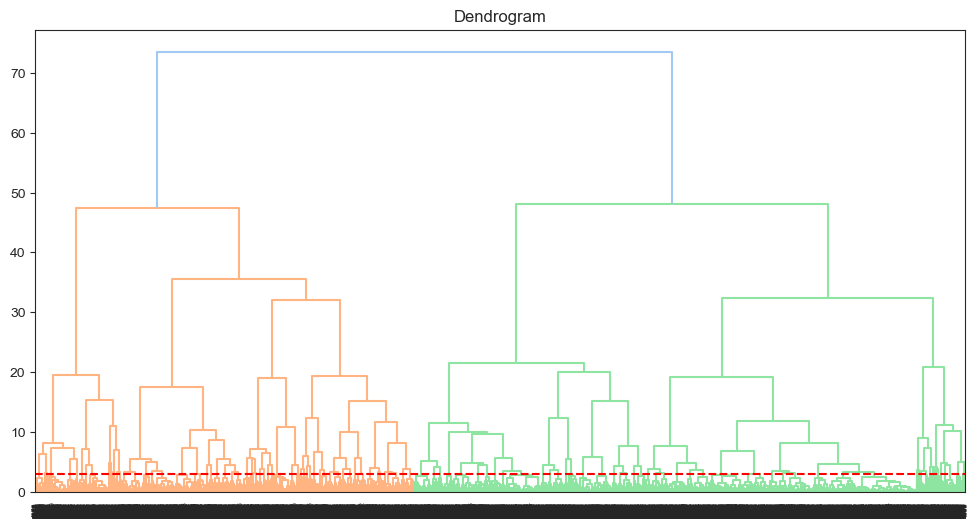

In [316]:
# Plotting dendrogram to identify optimum no. of clusters
mergings = linkage(df_preprocessed, method="ward")
plt.figure(figsize=(12, 6))
dendrogram(mergings)
plt.axhline(y=3, color='r', linestyle='--')
plt.title('Dendrogram')
plt.show()

En el dendograma anterior, se puede ver gráficamente que el número óptimo de clusters se muestra a nivel de 20 de altura, donde existen alrededor de 4-5 clusters, donde 5 es la cantidad que se seleccionó previamente, dando mayor soporte al número de clusters escogido como óptimo, dicho número de cluster captura más detalle (a diferencia de si se escogiera el 40 como altura de partición) pero aún mantiene grupos distintos.

# Visualization of clusters

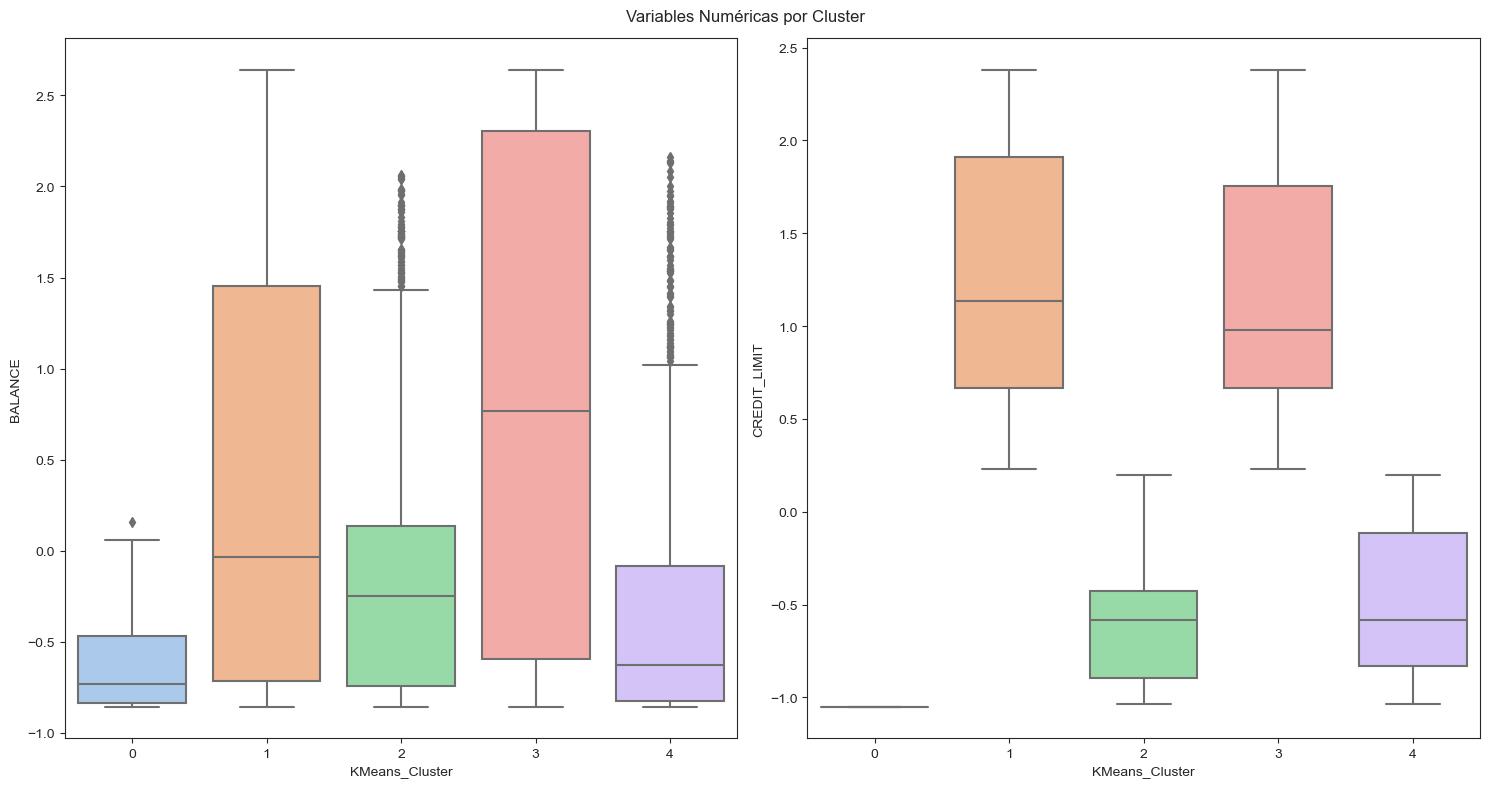

In [347]:
# Visualización Variables númericas
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
cols = ['BALANCE', 'CREDIT_LIMIT']
for i in range(len(cols)):
    sns.boxplot(data=data2, x='KMeans_Cluster', y=cols[i], ax=axs[i])
fig.suptitle('Variables Numéricas por Cluster')
plt.tight_layout()
plt.show()

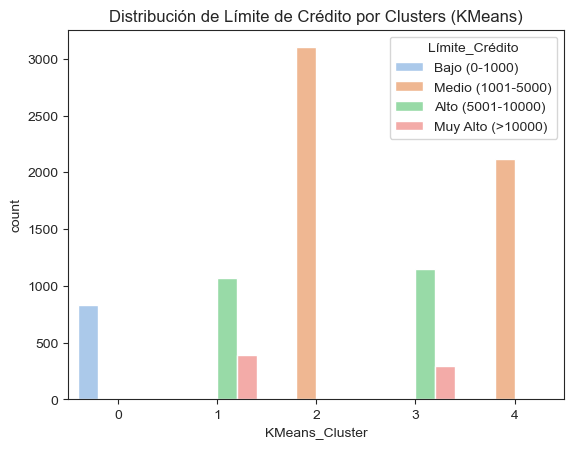

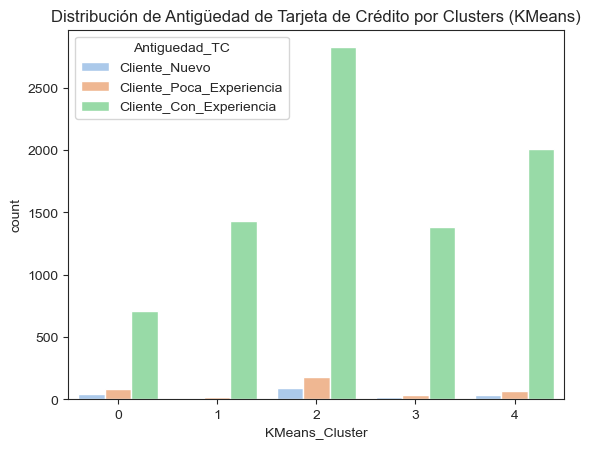

In [348]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras para la distribución de categorías entre clusters
sns.countplot(data=data2, x='KMeans_Cluster', hue='Límite_Crédito')
plt.title('Distribución de Límite de Crédito por Clusters (KMeans)')
plt.show()

# Repetir para la variable 'Antiguedad_TC'
sns.countplot(data=data2, x='KMeans_Cluster', hue='Antiguedad_TC')
plt.title('Distribución de Antigüedad de Tarjeta de Crédito por Clusters (KMeans)')
plt.show()


In [281]:
data2["KMeans_Cluster"].value_counts()

2    3101
4    2119
1    1458
3    1440
0     832
Name: KMeans_Cluster, dtype: int64

In [282]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
X = data2[cluster_cols]
xs = X.iloc[:, 0]
ys = X.iloc[:, 1]
zs = X.iloc[:, 2]
ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=kmeans.labels_)

ax.set_xlabel('Antiguedad_TC')
ax.set_ylabel('Límite_Crédito')


plt.show()

<Figure size 800x800 with 0 Axes>

In [283]:
for k in range(5):
    print(f'cluster nb : {k}')
    print(data2[data2['KMeans_Cluster'] == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
          BALANCE  BALANCE_FREQUENCY   PURCHASES  ONEOFF_PURCHASES  \
count  832.000000         832.000000  832.000000        832.000000   
mean    -0.575070           0.860999   -0.262882        144.004916   
min     -0.751640           0.000000   -0.469552          0.000000   
max      0.074186           1.000000    3.551627       8008.500000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count               832.00000    832.000000           832.000000   
mean                298.26893    177.321691             0.568572   
min                   0.00000      0.000000             0.000000   
max                3520.00000   5676.779668             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  832.000000                        832.000000   
mean                     0.087073                          0.481712   
min                      0.000000                          0.000000   
max      

# Interpretation of clusters

Análisis de variables númericas

1. Cluster 0. Clientes con balance negativo y por tanto un límite de crédito prácticamente inexistente.
2. Cluster 1. Clientes con un balance alto y un límite de crédito alto también, con gran dispersión.
3. Cluster 2. Clientes con balance bajo y un límite de crédito moderado, poca dispersión.
4. Cluster 3. Clientes con los mayores niveles de balance de todos los grupos y límite de crédito elevado.
5. Cluster 4. Clientes con un nivel de balance alrededor de "0" y límite de crédito bajo/ moderado.

Análisis de variables categóricas

1. Cluster 0. Clientes con poca experiencia de pago de TC y muy poco límite de crédito.
2. Cluster 1. Clientes con experiencia de pago de tc y límite de crédito muy alto.
3. Cluster 2. Clientes con experiencia de pago moderada y límite de crédito moderado.
4. Cluster 3. Clientes con experiencia de pago moderada y límite de crédito alto.
5. Cluster 4. Clientes con experiencia de pago  y límite de crédito medio bajo.

# Conclusiones

Se puede concluir a partir de la segmentación realizada que:

El cluster 3 destaca como el grupo con los clientes de mayor estabilidad financiera, pues tienen tanto altos balances como límites de crédito elevados. Este grupo podría incluir clientes de alto valor para la institución.

Mientras que el cluster 0 parece representar clientes con límites de crédito bajos y balances negativos, posiblemente indicando un perfil de riesgo más alto o clientes nuevos, por lo que se podría tomar en cuenta para mayor observación ya que podrían caer en default y ser representar una pérdida para la institución. 

Cluster 1 y Cluster 4 tienen una dispersión significativa en BALANCE y CREDIT_LIMIT, sugiriendo perfiles variados, lo cual podría indicar una combinación de clientes con diferentes perfiles de riesgo y necesidades de crédito; dando a entender que pueden ser buenos o clientes asimismo clientes más riesgosos. 

Cluster 2 muestra balances y límites de crédito moderados, con poca variabilidad, lo que sugiere un grupo de clientes estables pero con menor capacidad de gasto y crédito en comparación con el cluster 3, debido a los bajos balances. 